In [1]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

data_dict = pickle.load(open('./data/data_numeros.pickle', 'rb'))

data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

unique_labels = sorted(list(set(labels)))
label_to_num = {label: i for i, label in enumerate(unique_labels)}
num_labels = np.array([label_to_num[label] for label in labels])

X_train, X_test, y_train, y_test = train_test_split(data, num_labels, test_size=0.2, random_state=42)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [2]:
print(label_to_num)
print(num_labels)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
[0 0 0 ... 9 9 9]


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Ajustar la forma de los datos para la CNN
# Cada entrada tiene 21 puntos con 2 dimensiones (x,y)
X_train = X_train.reshape(-1, 21, 2)  
X_test = X_test.reshape(-1, 21, 2)

# Construcción del modelo CNN
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(21, 2)),  # Capa convolucional
    MaxPooling1D(pool_size=2),  # Capa de agrupamiento
    Conv1D(64, kernel_size=3, activation='relu'),  # Segunda capa convolucional
    MaxPooling1D(pool_size=2),  # Segunda capa de agrupamiento
    Flatten(),  # Aplanar la salida para la capa densa
    Dense(128, activation='relu'),  # Capa densa
    Dropout(0.5),  # Regularización
    Dense(len(label_to_num), activation='softmax')  # Capa de salida
])

# Compilación del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

# Guardar el modelo entrenado
model.save('./model/model_numeros_cnn.keras')

Epoch 1/50


c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2952 - loss: 1.9990 - val_accuracy: 0.7975 - val_loss: 0.5514
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7541 - loss: 0.5918 - val_accuracy: 0.8906 - val_loss: 0.3133
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8474 - loss: 0.3671 - val_accuracy: 0.9262 - val_loss: 0.2039
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9027 - loss: 0.2529 - val_accuracy: 0.9500 - val_loss: 0.1679
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9210 - loss: 0.2013 - val_accuracy: 0.9644 - val_loss: 0.1257
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9505 - loss: 0.1516 - val_accuracy: 0.9800 - val_loss: 0.0941
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9574 - loss: 0.1313 - val_accuracy: 0.9856 - val_loss: 0.0634
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9697 - loss: 0.0986 - val_accuracy: 0.9881 - val_

In [4]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9955 - loss: 0.0061   
Loss: 0.003942811395972967, Accuracy: 0.9975000023841858


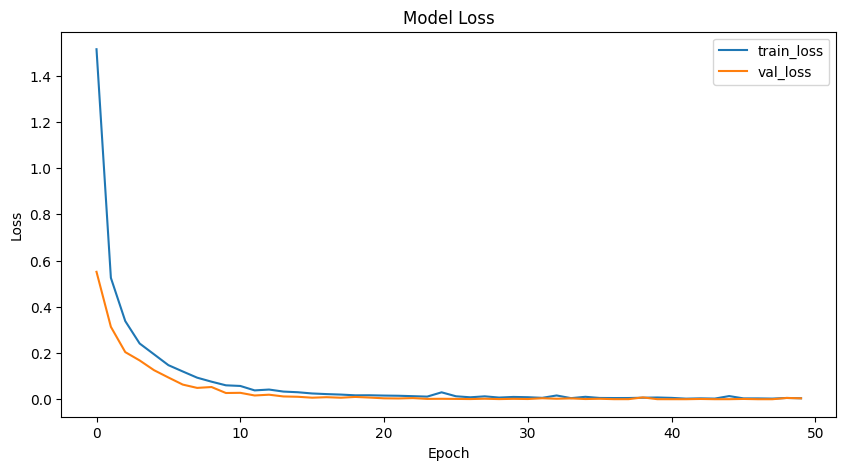

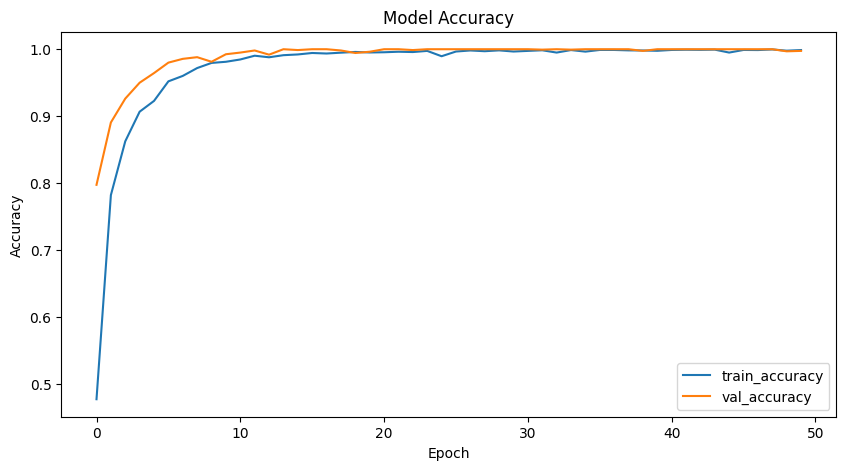

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
